# Logistic Regression From Scratch

### Logistic Regression
- Linear model.
- Probabilistic discriminative model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Logistic Regression equation:
$$  \mathbf{w}^{\tau+1} = \mathbf{w}^{\tau} - \eta \frac{\partial{E(\mathbf{w})}}{\partial{\mathbf{w}}}  $$
**E(w) :**
$$  E(\mathbf{w}) = -\ln{p(\mathbf{t}|\mathbf{w})} = - \sum_{i=1}^{N}\{ t_n \ln{y_n} + (1-t_n) \ln{(1-y_n)} \} $$
**y :**
$$  y_n = y(\phi(\mathbf{x}_n)) = \sigma(\mathbf{w}^T\phi(\mathbf{x}_n))  $$
**The derivative of E(w) w.r.t. w :**
$$  \frac{\partial{E(\mathbf{w})}}{\partial{\mathbf{w}}} = \sum_{i=1}^{N} (y_n - t_n) \phi(\mathbf{x}_n)  $$
**In this case :**
$$  \phi(\mathbf{x}_n) = \mathbf{x}_n  $$
**So the derivative of E(w) w.r.t. w will be :**
$$  \frac{\partial{E(\mathbf{w})}}{\partial{\mathbf{w}}} = \frac{1}{m} X^T (Y - t)  $$
**Therefore :**
$$  \therefore \mathbf{w}^{\tau+1} = \mathbf{w}^{\tau} - \eta \frac{1}{m} X^T (Y - t)  $$

In [2]:
class Logistic_Regression:

    def __activation_func(self, g):
        return (1 / (1 + np.exp(-g)))
    
    def predict(self, X):
        if (hasattr(self, 'W')):
            X = np.hstack((X, np.ones((len(X), 1))))
            g = X@self.W
            a = np.round(self.__activation_func(g))
            return a
        else:
            print('Please run fit in order to be able to use predict')
          
    def __predict(self, X):
        g = X@self.W
        a = self.__activation_func(g)
        return a
            
    def accuracy(self, y_actual, y_predicted):
        return np.mean(y_actual == y_predicted) * 100
    
    def scatter_plot(self):
        if (hasattr(self, 'X') & hasattr(self, 'W') & hasattr(self, 't')):
            if (len(self.X[0]) == 3):
                color_cond=['blue' if i==1 else 'green' for i in self.t  ]
                plt.scatter(np.array(self.X[:,0]), np.array(self.X[:,1]), color=color_cond)        

                slope = -(self.W[0] / self.W[1])
                intercept = -(self.W[2] / self.W[1])

                ax = plt.gca()
                ax.autoscale(False)
                x_vals = np.array(ax.get_xlim())
                y_vals = intercept + (slope * x_vals)
                plt.plot(x_vals, y_vals);

                plt.xlabel('X1')
                plt.ylabel('X2')
                plt.title('Data(X1, X2)')
                plt.show()
            else:
                print('The scatter plot is only available when the data has only 2 features')
        else:
            print('Please run fit in order to be able to plot the Data')
        return self

    def __compute_cost(self):
        epsilon = 1e-5
        cost_1 = - self.t.reshape(1,self.m) @ np.log(self.y + epsilon)
        cost_2 = - (1 - self.t.reshape(1,self.m)) @ np.log(1 - self.y + epsilon)
        cost = (1/self.m) * (cost_1 + cost_2)
        return cost

    def plot_cost_history(self):
        if (hasattr(self, 'iterations') & hasattr(self, 'cost_history')):
            plt.plot(range(self.iterations), self.cost_history)
            plt.xlabel('Iterations')
            plt.ylabel('Cost')
            plt.title('Cost History')
            plt.show()
        else:
            print('Please run fit in order to be able to plot the cost history')
        return self

    def fit(self, X, t, learning_rate = 1, iterations = 100):
        self.m = len(X)
        self.X = np.hstack((X, np.ones((len(X), 1))))
        self.W = np.zeros(len(self.X[0]))
        self.t = t
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.cost_history = np.zeros((self.iterations))
        cost = np.zeros(1)
        
        self.iteration = 0
        while self.iteration < self.iterations:
            old_W = np.copy(self.W)
            old_cost = np.copy(cost)
            
            # see equations
            self.y = self.__predict(self.X)
            cost = self.__compute_cost()
            self.cost_history[self.iteration] = cost
            
            self.W = self.W - (self.learning_rate / self.m ) * self.X.T @ (self.y - self.t)
            self.iteration = self.iteration + 1
            if (np.array_equal(self.W, old_W) or cost == old_cost):
                break
        return self

# Dataset 1

### About Data:
    Data with outliers to check the effect of outliers.

### Training

In [3]:
Data1 = np.genfromtxt('Data1.txt')
# Data = Data[Data[:,0] < 40] # Without outliers

In [4]:
X1 = Data1[:, 0:2]
t1 = np.array([1 if i >= 0 else 0 for i in Data1[:, 2]])

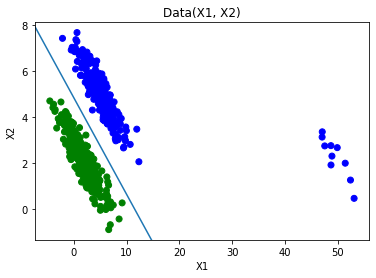

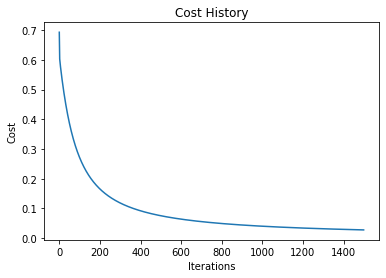

iterations 1500


In [5]:
logistic_regression1 = Logistic_Regression()
logistic_regression1.fit(X1, t1, 0.2, 1500)
logistic_regression1.scatter_plot()
logistic_regression1.plot_cost_history()
print('iterations', logistic_regression1.iteration)

### Testing

In [6]:
Data1_test = np.genfromtxt('Test1.txt')
X1_test = Data1_test[:, :2]
y1_actual = np.array([1 if i >= 0 else 0 for i in Data1_test[:, 2]])

In [7]:
y1_predicted = logistic_regression1.predict(X1_test)
acc1 = logistic_regression1.accuracy(y1_actual, y1_predicted)
print('Accuracy', acc1, '%')

Accuracy 100.0 %


# Dataset 2

### About Data:
    It is randomly generated data using sklearn datasets (make_classification)


### Training

In [8]:
from sklearn.datasets import make_classification

In [9]:
X2, t2 = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)

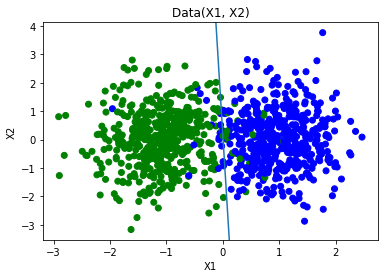

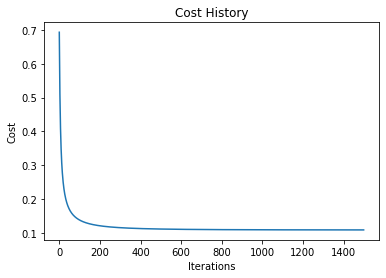

iterations 1500


In [10]:
logistic_regression2 = Logistic_Regression()
logistic_regression2.fit(X2, t2, 0.3, 1500)
logistic_regression2.scatter_plot()
logistic_regression2.plot_cost_history()
print('iterations', logistic_regression2.iteration)

### Testing

In [11]:
X2_test, y2_actual = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14, class_sep=1)

In [12]:
y2_predicted = logistic_regression2.predict(X2_test)
acc2 = logistic_regression2.accuracy(y2_actual, y2_predicted)
print('Accuracy', acc2, '%')

Accuracy 98.66666666666667 %


# Dataset 3 (Banknote Dataset)

### About Data:
    The Banknote Dataset involves predicting whether a given banknote is authentic given a number of measures taken from a photograph.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 1,372 observations with 4 input variables and 1 output variable. The variable names are as follows:

1. Variance of Wavelet Transformed image (continuous).
2. Skewness of Wavelet Transformed image (continuous).
3. Kurtosis of Wavelet Transformed image (continuous).
4. Entropy of image (continuous).
5. Class (0 for authentic, 1 for inauthentic).

##### Source:
http://archive.ics.uci.edu/ml/datasets/banknote+authentication


##### Note:
    We used the first 2 features only in the classification. After shuffling the data, the first 1000 rows used in training and the rest (372 rows) used for testing the result.

### Training

In [13]:
Data3 = np.genfromtxt('data_banknote_authentication.txt', delimiter=',')
Data3.shape

(1372, 5)

In [14]:
np.random.shuffle(Data3)

In [15]:
X3 = Data3[:1000, 0:2]
t3 = Data3[:1000, 4]

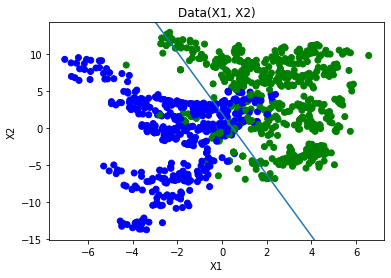

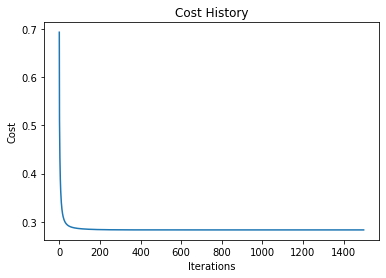

iterations 1500


In [16]:
logistic_regression3 = Logistic_Regression()
logistic_regression3.fit(X3, t3, 0.1, 1500)
logistic_regression3.scatter_plot()
logistic_regression3.plot_cost_history()
print('iterations', logistic_regression3.iteration)

### Testing

In [17]:
X3_test = Data3[1000:, 0:2]
y3_actual = Data3[1000:len(Data3), 4]
y3_predicted = logistic_regression3.predict(X3_test)
acc3 = logistic_regression3.accuracy(y3_actual, y3_predicted)
print('Accuracy', acc3, '%')

Accuracy 92.47311827956989 %
